# Data Exploration and Wrangling

## 1. Loading the data

In [5]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from itertools import chain
from sklearn.decomposition import PCA
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) 
import plotly.io as pio
pio.renderers.default = "svg"
#Loading the data
movie_details = pd.read_csv('data/raw/BollywoodMovieDetail.csv')
actors = pd.read_csv('data/raw/BollywoodActorRanking.csv')
directors = pd.read_csv('data/raw/BollywoodDirectorRanking.csv')

All of the three above datasets  give us data to judge whether the movie will be a hit or not.

Movie_details gives us information about the movie. actors and directors gives us information about all the actors appearing in these movies and directors directing these movies respectively.

We'll dive into all these datasets one at a time and extract useful information information into one single dataset called train.

# 2. EDA 

# a) Movie Details

In [6]:
movie_details.sample(3) 

,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
465,tt0499041,Kalyug,2005,09 Dec 2005,Action | Crime | Drama,Jay Dixit (dialogue) | Anand Sivakumaran (scre...,Kunal Khemu | Deepal Shaw | Smiley Suri | Atul...,Mohit Suri,0.0,5
285,tt0419828,Hyderabad Blues 2,2004,02 Jul 2004,Drama | Comedy,Nagesh Kukunoor,Tisca Chopra | Jyoti Dogra | Anuj Gurwara | El...,Nagesh Kukunoor,0.0,1
1200,tt3044882,Nasha,2013,26 Jul 2013,Drama | Romance | Thriller,Ajit Rajpal,Ranbir Chakma | Nikhil Desai | Raj Kesaria | R...,Amit Saxena,0.0,2


### Short explanation of the data in each column:

1. imdbId : Unique identifier of each movie
2. title : Title of movie
3. releaseYear : Year of release of movie. Here we have information of movies from 2001-2014
4. releaseDate : Date of release of movies
5. genre : Genre of movie
6. writers : Movie writers
7. actors : Actors involved in the movie
8. directors : Director(s) directing in the movie
9. sequel : Indicating whether the movie has a sequel or is a sequel
10. hitFlop : Column indicating if movie is a hit or flop. It has values form 1-9 indicating this. This is the target variable whihc we have to predict

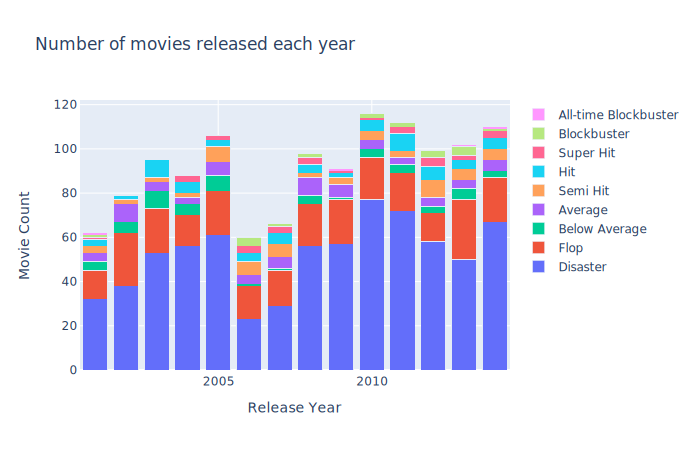

In [7]:
# Exploring the number of movies in each release year from each category
b = pd.DataFrame(movie_details['releaseYear'].value_counts())
cols = np.array(np.arange(1,10))
for i in cols:
    b[i]=0    
for i in np.array(b.index):
    a = pd.DataFrame(movie_details.loc[movie_details['releaseYear']==i,'hitFlop'].value_counts()).sort_index()
    for j in np.array(a.index):
        b.loc[i,j] = np.array(a.loc[j])
b['year'] = np.array(b.index)

fig = go.Figure(go.Bar(x=b['year'], y=b.loc[:,1], name='Disaster'))
fig.add_trace(go.Bar(x=b['year'], y=b.loc[:,2], name='Flop'))
fig.add_trace(go.Bar(x=b['year'], y=b.loc[:,3], name='Below Average'))
fig.add_trace(go.Bar(x=b['year'], y=b.loc[:,4], name='Average'))
fig.add_trace(go.Bar(x=b['year'], y=b.loc[:,5], name='Semi Hit'))
fig.add_trace(go.Bar(x=b['year'], y=b.loc[:,6], name='Hit'))
fig.add_trace(go.Bar(x=b['year'], y=b.loc[:,7], name='Super Hit'))
fig.add_trace(go.Bar(x=b['year'], y=b.loc[:,8], name='Blockbuster'))
fig.add_trace(go.Bar(x=b['year'], y=b.loc[:,9], name='All-time Blockbuster'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},
                 xaxis_title = 'Release Year',yaxis_title = 'Movie Count',
                 title = 'Number of movies released each year')
fig.show()

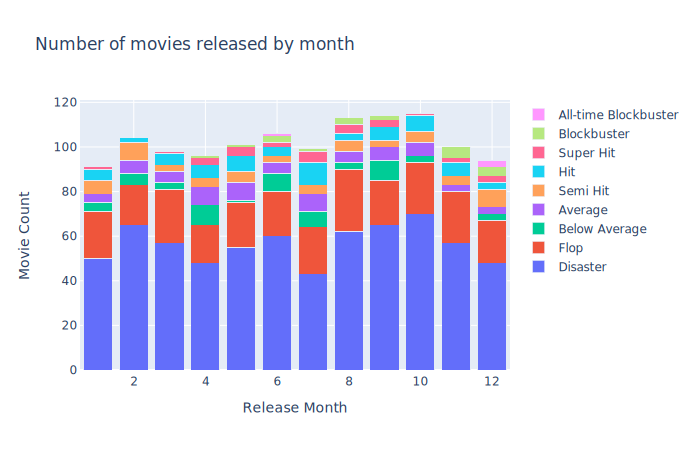

In [8]:
#Release Month
#From the releaseDate ,we can also gauge the month of release of the movie which maybe a huge factor
#in deciding a movie's success
movie_details['releaseDate'] = pd.to_datetime(movie_details['releaseDate'])
b = pd.DataFrame(movie_details['releaseDate'].apply(lambda x:x.month).value_counts())
cols = np.array(np.arange(1,10))
for i in cols:
    b[i]=0    
for i in np.array(b.index):
    a = pd.DataFrame(movie_details.loc[movie_details['releaseDate'].apply(lambda x:x.month)==i,'hitFlop'].value_counts()).sort_index()
    for j in np.array(a.index):
        b.loc[i,j] = np.array(a.loc[j])
b['month'] = np.array(b.index)   

fig = go.Figure(go.Bar(x=b['month'], y=b.loc[:,1], name='Disaster'))
fig.add_trace(go.Bar(x=b['month'], y=b.loc[:,2], name='Flop'))
fig.add_trace(go.Bar(x=b['month'], y=b.loc[:,3], name='Below Average'))
fig.add_trace(go.Bar(x=b['month'], y=b.loc[:,4], name='Average'))
fig.add_trace(go.Bar(x=b['month'], y=b.loc[:,5], name='Semi Hit'))
fig.add_trace(go.Bar(x=b['month'], y=b.loc[:,6], name='Hit'))
fig.add_trace(go.Bar(x=b['month'], y=b.loc[:,7], name='Super Hit'))
fig.add_trace(go.Bar(x=b['month'], y=b.loc[:,8], name='Blockbuster'))
fig.add_trace(go.Bar(x=b['month'], y=b.loc[:,9], name='All-time Blockbuster'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},
                 xaxis_title = 'Release Month',yaxis_title = 'Movie Count',
                 title = 'Number of movies released by month')
fig.show()


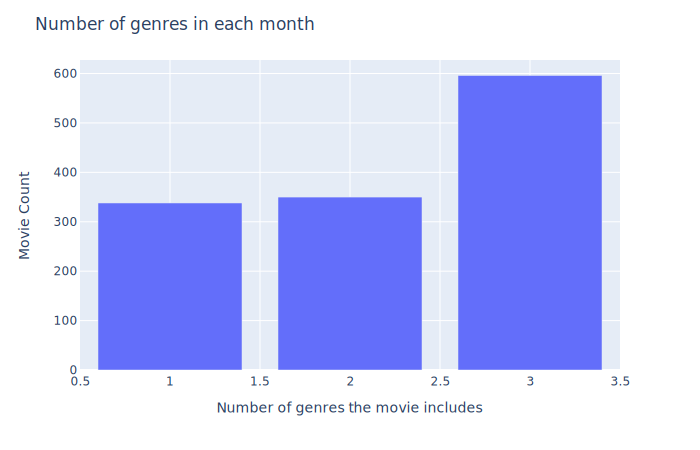

In [9]:
#Genre
#Data cleaning
movie_details.loc[movie_details['genre']=='Romance |Drama','genre'] = ['Romance | Drama']
movie_details.loc[movie_details['genre']=='Action |Crime','genre'] = ['Action | Crime']
movie_details.loc[movie_details['genre']=='Action |Romance','genre'] = ['Action | Romance']
movie_details.loc[movie_details['genre']=='Romance |Drama |Musical','genre'] = ['Romance | Drama | Musical']
movie_details.loc[movie_details['genre']=='Romance |Musical |Drama','genre'] = ['Romance | Musical | Drama']
movie_details.loc[movie_details['genre']=='Action |Drama |Adventure','genre'] = ['Action | Drama | Adventure']
movie_details.loc[movie_details['genre'].isna(),'genre']=['Drama','Drama']

a = movie_details['genre'].apply(lambda x:(len(x.split(' | ')))).value_counts()
fig = px.bar(x = np.array(a.index),y=a)
fig.update_layout(yaxis_title = 'Movie Count',xaxis_title = 'Number of genres the movie includes'
                  ,title = 'Number of genres in each month')
fig.show()

Most movies are a mixture of 3 genres

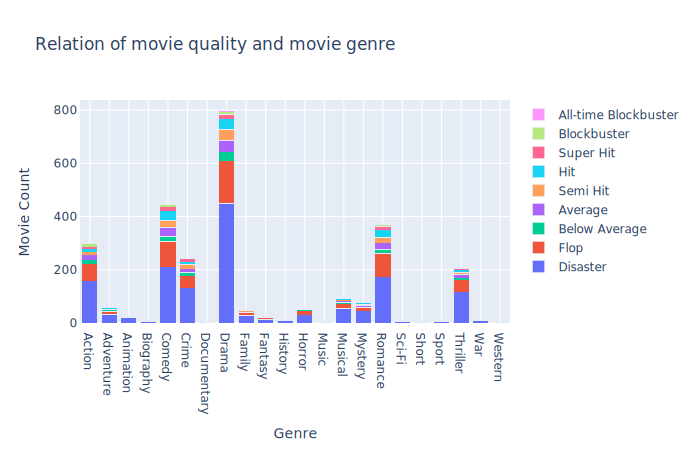

In [10]:
a = pd.DataFrame(movie_details['genre'].apply(lambda x:x.split(' | ')[0]))
a['genre2'] = movie_details['genre'].apply(lambda x:'NA' if len(x.split(' | '))==1 else x.split(' | ')[1])
a['genre3'] = movie_details['genre'].apply(lambda x:'NA' if len(x.split(' | '))<3 else x.split(' | ')[2])
a['hitFlop'] = movie_details['hitFlop']
b = []
b.append(a['genre'])
b.append(a['genre2'])
b.append(a['genre3'])
c =list(chain.from_iterable(b))
c = (list(filter(lambda x:x!='NA',c)))
c = pd.DataFrame(pd.Series(c).value_counts())
c['genre'] = np.array(c.index)
cols = np.array(np.arange(1,10))
for i in cols:
    c[i]=0 
for i in np.array(a.index):
    for j in np.array(c.index):
        for k in ['genre','genre2','genre3']:
            if a.loc[i,k]==j:
                c.loc[j,a.loc[i,'hitFlop']]+=1
fig = go.Figure(go.Bar(x=c['genre'], y=c.loc[:,1], name='Disaster'))
fig.add_trace(go.Bar(x=c['genre'], y=c.loc[:,2], name='Flop'))
fig.add_trace(go.Bar(x=c['genre'], y=c.loc[:,3], name='Below Average'))
fig.add_trace(go.Bar(x=c['genre'], y=c.loc[:,4], name='Average'))
fig.add_trace(go.Bar(x=c['genre'], y=c.loc[:,5], name='Semi Hit'))
fig.add_trace(go.Bar(x=c['genre'], y=c.loc[:,6], name='Hit'))
fig.add_trace(go.Bar(x=c['genre'], y=c.loc[:,7], name='Super Hit'))
fig.add_trace(go.Bar(x=c['genre'], y=c.loc[:,8], name='Blockbuster'))
fig.add_trace(go.Bar(x=c['genre'], y=c.loc[:,9], name='All-time Blockbuster'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'},
                 yaxis_title = 'Movie Count',xaxis_title='Genre',
                 title = 'Relation of movie quality and movie genre')
fig.show()


Some observations which can be made from the above Graph:
* Drama,Romance,Comedy and Action are the most popular genres
* Other genres are quite rare and most of them are also not successes

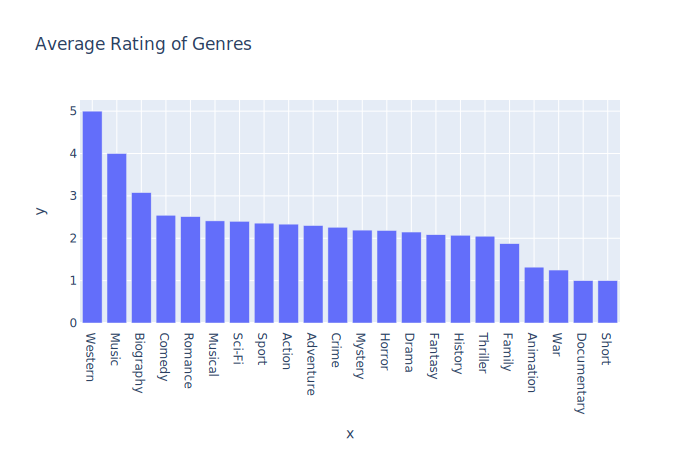

In [11]:
c['Mean_Rating'] = 0
for i in np.arange(1,10):
    c['Mean_Rating']+= i*c[i]
c['Mean_Rating'] = c['Mean_Rating']/c[0]    
c = c.sort_values(by ='Mean_Rating',ascending=False)
px.bar(x= c['genre'],y =c['Mean_Rating'],title ='Average Rating of Genres' )


From the above graph we can infer:
* From the popular genres , comedies and romance are quite successful
* Drama and thriller movies are suprisingly not so successful as thought

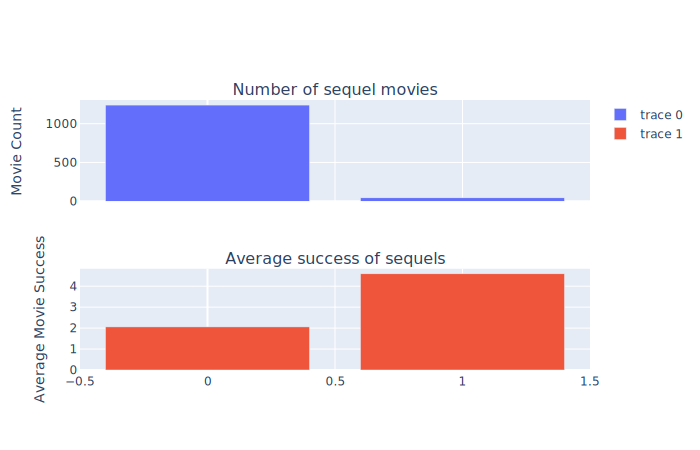

In [12]:
#Sequel
movie_details.loc[movie_details['sequel'].isna(),'sequel']=[0,0,0]
movie_details.loc[movie_details['sequel']==2,'sequel']=[1]

fig = make_subplots(rows=2,cols=1,shared_xaxes=True,subplot_titles = ('Number of sequel movies','Average success of sequels'))

a = movie_details['sequel'].value_counts()
fig.add_trace(go.Bar(x=a.index,y=a),row=1,col=1)
fig.update_yaxes(title_text = 'Movie Count',row=1,col=1)

a= pd.DataFrame(movie_details.groupby('sequel')['hitFlop'].mean())
fig.add_trace(go.Bar(x =a.index,y=a['hitFlop']),row=2,col=1)
fig.update_yaxes(title_text = 'Average Movie Success',row=2,col=1)

fig.show()

As we can see,most movies are original movies

Sequel movies are much more successful than original movies

## b) Actors Dataset

Actors Dataset Columns:
* **movieCount** tells us about the number of movies done by the actor
* **ratingSum** tells us how succesful the actors movies were
* **normalizedMovieRank** gives a numerical value from1 to 10 depicting the success of the actor's movies
* **googleHits** tells us about how popular the respective actor is
* **normalizedRating** combines both the success and popularity of the actor and rates it on a scale of 1 to 10

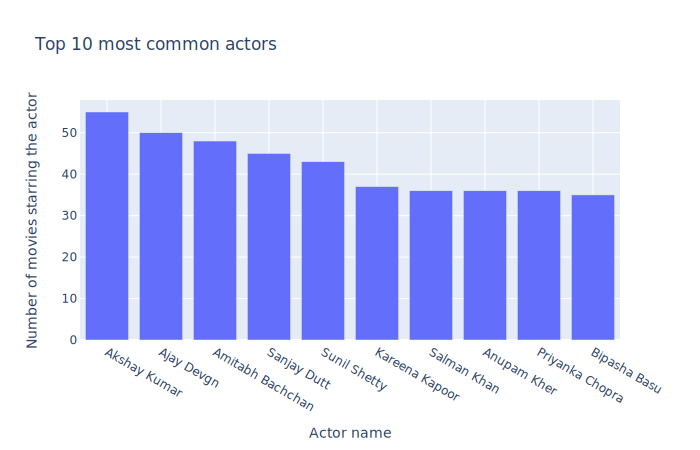

In [13]:
#Data Cleaning
a = movie_details.loc[movie_details['actors'].isna()].index
movie_details = movie_details.drop(a,axis=0)
b = pd.DataFrame(movie_details['actors'].apply(lambda x:len(x.split(' | '))))
a = movie_details.loc[b['actors']!=4].index
movie_details = movie_details.drop(a,axis=0)

a = pd.DataFrame(movie_details['actors'].apply(lambda x:x.split(' | ')[0]))
a['actor2'] = movie_details['actors'].apply(lambda x:x.split(' | ')[1])
a['actor3'] = movie_details['actors'].apply(lambda x:x.split(' | ')[2])
a['actor4'] = movie_details['actors'].apply(lambda x:x.split(' | ')[3])
a['hitFlop'] = movie_details['hitFlop']
b = []
b.append(a['actors'])
b.append(a['actor2'])
b.append(a['actor3'])
b.append(a['actor4'])
c =list(chain.from_iterable(b))

d = pd.Series(c).value_counts()[:10]
fig = px.bar(x=d.index,y =d,title ='Top 10 most common actors')
fig.update_layout(yaxis_title ='Number of movies starring the actor',xaxis_title ='Actor name')
fig.show()

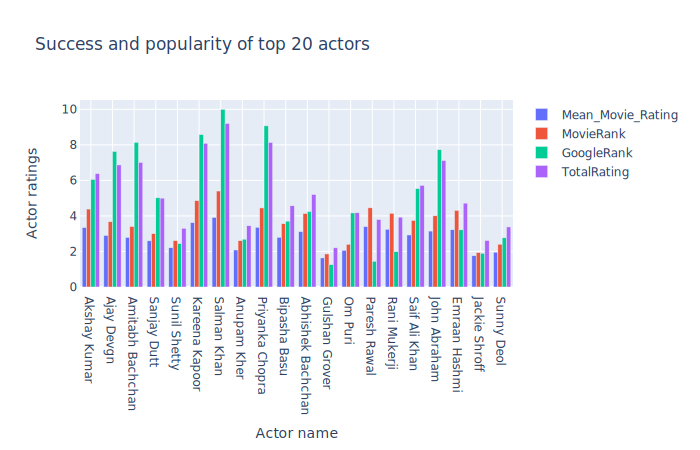

In [14]:
# Data wrangling to tell us useful information
f = pd.Series(c).value_counts()[:20]
f = pd.DataFrame(f)
cols = np.array(np.arange(1,10))
for i in cols:
    f[i]=0 
for i in np.array(a.index):
    for j in np.array(f.index):
        for k in ['actors','actor2','actor3','actor4']:
            if a.loc[i,k]==j:
                f.loc[j,a.loc[i,'hitFlop']]+=1
f['Mean_Rating'] = 0
for i in np.arange(1,10):
    f['Mean_Rating']+= i*f[i]
f['Mean_Rating'] = f['Mean_Rating']/f[0]    
g = f.merge(actors,left_index=True,right_on ='actorName')
layout  =go.Layout(title_text = 'Success and popularity of top 20 actors',yaxis_title ='Actor ratings',xaxis_title = 'Actor name')
fig = go.Figure(data=[
    go.Bar(name='Mean_Movie_Rating',x = g['actorName'],y =g['Mean_Rating']),
    go.Bar(name ='MovieRank',x = g['actorName'],y=g['normalizedMovieRank']),
    go.Bar(name ='GoogleRank',x =g['actorName'],y =g['normalizedGoogleRank']),
    go.Bar(name='TotalRating',x=g['actorName'],y =g['normalizedRating'])
],layout = layout)
fig.show()

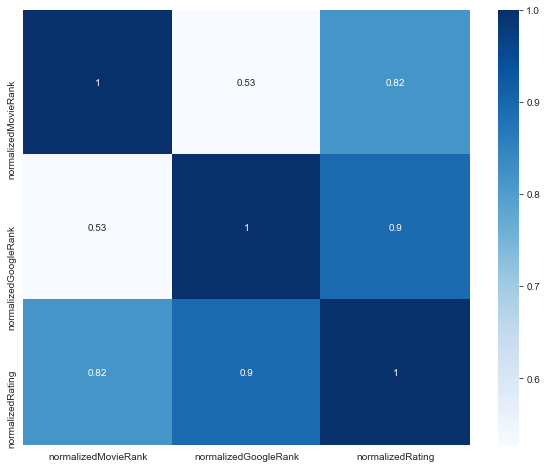

In [15]:
# Heatmap of actor dataset columns 
cols = ['normalizedMovieRank','normalizedGoogleRank','normalizedRating']
fig,ax = plt.subplots(figsize =(10,8))
sns.heatmap(actors[cols].corr(),annot=True,ax=ax,cmap = plt.cm.Blues)

Some observations from the above heatmap:
* The popularity of actor and success of movie are not so much correlated as expected
* The overall rating depends a lot on the success and popularity both of the actors

## b) Directors Dataset

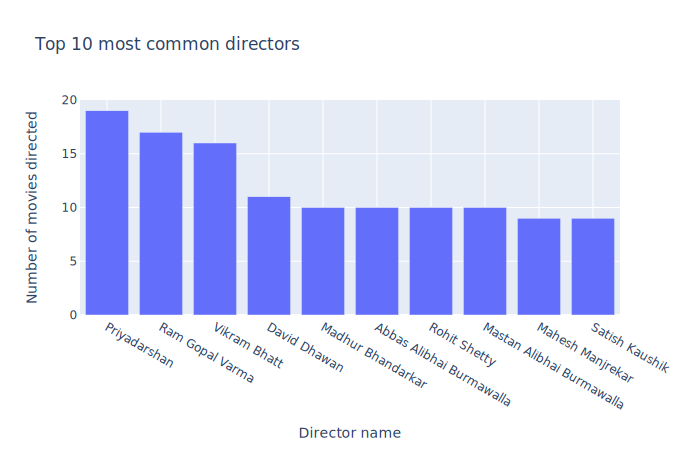

In [16]:
movie_details.loc[movie_details['directors'].isna(),'directors']=['Tarun Wadhwa','T.L.V.Prasad','Partho Ghosh']
a = pd.DataFrame(movie_details['directors'].apply(lambda x:x.split(' | ')[0]))
b = pd.DataFrame(movie_details['directors'].apply(lambda x:len(x.split(' | '))))
a['directors2'] = movie_details.loc[b.loc[b['directors']>1].index,'directors'].apply(lambda x:x.split(' | ')[1])
a['hitFlop'] = movie_details['hitFlop']

b=[]
b.append(a['directors'])
b.append(a['directors2'])
c =list(chain.from_iterable(b))

d = pd.Series(c).value_counts()[:10]
fig = px.bar(x=d.index,y =d,title ='Top 10 most common directors')
fig.update_layout(yaxis_title ='Number of movies directed',xaxis_title ='Director name')
fig.show()

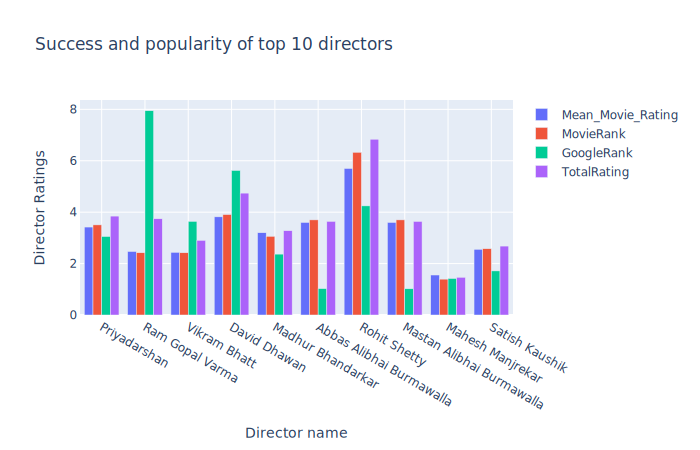

In [17]:
f = pd.Series(c).value_counts()[:10]
f = pd.DataFrame(f)
cols = np.array(np.arange(1,10))
for i in cols:
    f[i]=0 
for i in np.array(a.index):
    for j in np.array(f.index):
        for k in ['directors','directors2']:
            if a.loc[i,k]==j:
                f.loc[j,a.loc[i,'hitFlop']]+=1
f['Mean_Rating'] = 0
for i in np.arange(1,10):
    f['Mean_Rating']+= i*f[i]
f['Mean_Rating'] = f['Mean_Rating']/f[0]   
g = f.merge(directors,left_index=True,right_on ='directorName')
layout  =go.Layout(title_text = 'Success and popularity of top 10 directors',xaxis_title= 'Director name',yaxis_title = 'Director Ratings')
fig = go.Figure(data=[
    go.Bar(name='Mean_Movie_Rating',x = g['directorName'],y =g['Mean_Rating']),
    go.Bar(name ='MovieRank',x = g['directorName'],y=g['normalizedMovieRank']),
    go.Bar(name ='GoogleRank',x =g['directorName'],y =g['normalizedGoogleRank']),
    go.Bar(name='TotalRating',x=g['directorName'],y =g['normalizedRating'])
],layout = layout)
fig.show()

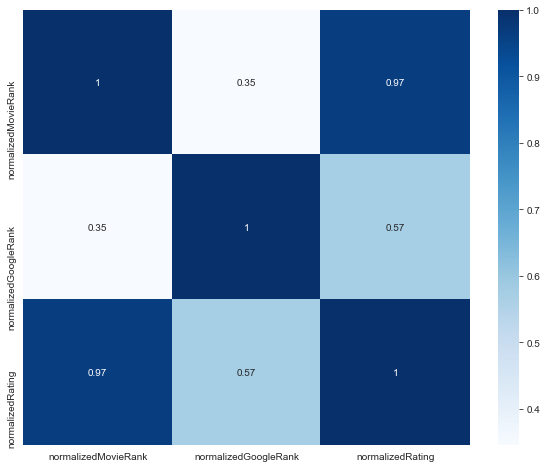

In [18]:
# Heatmap of director dataset features 
cols = ['normalizedMovieRank','normalizedGoogleRank','normalizedRating']
fig,ax = plt.subplots(figsize =(10,8))
sns.heatmap(directors[cols].corr(),annot=True,ax=ax,cmap = plt.cm.Blues)


# 3. Feature Engineering

Now we will select information from the three datasets to make our final prediction model

In [19]:
train = pd.DataFrame(movie_details['title'])
#releaseYear
train['releaseYear'] = movie_details['releaseYear']
#release Month
train['releaseMonth'] = movie_details['releaseDate'].apply(lambda x:x.month)
#Sequel
train['sequel'] = movie_details['sequel']
# Release Wuarter
train['releaseQuarter'] = movie_details['releaseDate'].apply(lambda x:x.quarter)
train.loc[movie_details['releaseDate'].isna(),'releaseMonth'] = np.random.randint(1,13,size=51)
train.loc[movie_details['releaseDate'].isna(),'releaseQuarter'] = train.loc[movie_details['releaseDate'].isna(),'releaseMonth'].apply(lambda x:(x/4)+1)

For genres we can create an One hot encoding for the train dataset

In [20]:
#Genres
#Data wrangling
a = pd.DataFrame(movie_details['genre'].apply(lambda x:x.split(' | ')[0]))
a['genre2'] = movie_details['genre'].apply(lambda x:'NA' if len(x.split(' | '))==1 else x.split(' | ')[1])
a['genre3'] = movie_details['genre'].apply(lambda x:'NA' if len(x.split(' | '))<3 else x.split(' | ')[2])
a['hitFlop'] = movie_details['hitFlop']
cols = ['Drama', 'Comedy', 'Romance', 'Action', 'Crime', 'Thriller', 'Musical',
       'Mystery', 'Horror', 'Adventure', 'Family']
for i in cols:
    train['genre_'+i]=0
train['genre_other']=0
for i in np.array(a.index):
    for j in cols:
        for k in ['genre','genre2','genre3']:
            if a.loc[i,k]==j:
                train.loc[i,'genre_'+j]+=1
for i in np.array(a.index):
    for k in ['genre','genre2','genre3']:
        if (a.loc[i,k] not in cols) & (a.loc[i,k]!='NA'):
            train.loc[i,'genre_other']+=1

#To reduce the number of columns, we will apply PCA on the genre one-hot encoded columns            
pca = PCA(0.9,svd_solver='full')
cols = ['genre_Drama','genre_Comedy', 'genre_Romance', 'genre_Action',
       'genre_Crime', 'genre_Thriller', 'genre_Musical', 'genre_Mystery',
       'genre_Horror', 'genre_Adventure', 'genre_Family', 'genre_other']
pca.fit(train[cols])
pca_train = pca.transform(train[cols])
train2 = pd.DataFrame(pca_train,index = train.index)
cols = ['title', 'releaseYear', 'releaseMonth', 'sequel', 'releaseQuarter']
for i in cols:
    train2[i]=0
train2[cols] = train[cols]

From actors dataset , we will take all the information form its columns and take the sum total of each actors data to put in each movie

In [21]:
a = pd.DataFrame(movie_details['actors'].apply(lambda x:x.split(' | ')[0]))
a['actor2'] = movie_details['actors'].apply(lambda x:x.split(' | ')[1])
a['actor3'] = movie_details['actors'].apply(lambda x:x.split(' | ')[2])
a['actor4'] = movie_details['actors'].apply(lambda x:x.split(' | ')[3])
train2['actor_movieCount'] = 0
train2['actor_ratingSum']=0
train2['actor_normalizedMovieRank']=0
train2['actor_normalizedGoogleRank']=0
train2['actor_normalizedRating']=0

for i in np.array(a.index):
    for j in actors['actorName']:
        for k in ['actors','actor2','actor3','actor4']:
            if a.loc[i,k]==j:
                train2.loc[i,'actor_movieCount']+=np.array(actors.loc[actors['actorName']==j,'movieCount'])
                train2.loc[i,'actor_ratingSum']+=np.array(actors.loc[actors['actorName']==j,'ratingSum'])
                train2.loc[i,'actor_normalizedMovieRank']+=np.array(actors.loc[actors['actorName']==j,'normalizedMovieRank'])
                train2.loc[i,'actor_normalizedGoogleRank']+=np.array(actors.loc[actors['actorName']==j,'normalizedGoogleRank'])
                train2.loc[i,'actor_normalizedRating']+=np.array(actors.loc[actors['actorName']==j,'normalizedRating'])

We will do similiar for directors dataset too

In [22]:
a = pd.DataFrame(movie_details['directors'].apply(lambda x:x.split(' | ')[0]))
a['director2'] = movie_details['directors'].apply(lambda x:'NA' if len(x.split(' | '))==1 else x.split(' | ')[1])

train2['director_movieCount'] = 0
train2['director_ratingSum']=0
train2['director_normalizedMovieRank']=0
train2['director_normalizedGoogleRank']=0
train2['director_normalizedRating']=0

for i in np.array(a.index):
    for j in directors['directorName']:
        for k in ['directors','director2']:
            if a.loc[i,k]==j:
                train2.loc[i,'director_movieCount']+=np.array(directors.loc[directors['directorName']==j,'movieCount'])
                train2.loc[i,'director_ratingSum']+=np.array(directors.loc[directors['directorName']==j,'ratingSum'])
                train2.loc[i,'director_normalizedMovieRank']+=np.array(directors.loc[directors['directorName']==j,'normalizedMovieRank'])
                train2.loc[i,'director_normalizedGoogleRank']+=np.array(directors.loc[directors['directorName']==j,'normalizedGoogleRank'])
                train2.loc[i,'director_normalizedRating']+=np.array(directors.loc[directors['directorName']==j,'normalizedRating'])

In [23]:
train2['hitFlop']=  movie_details['hitFlop']
train2['actor_normalizedMovieRank'] = train2['actor_normalizedMovieRank'].fillna(0)
train2['actor_normalizedGoogleRank'] = train2['actor_normalizedGoogleRank'].fillna(0)

## Creating a heatmap from the features of train dataset

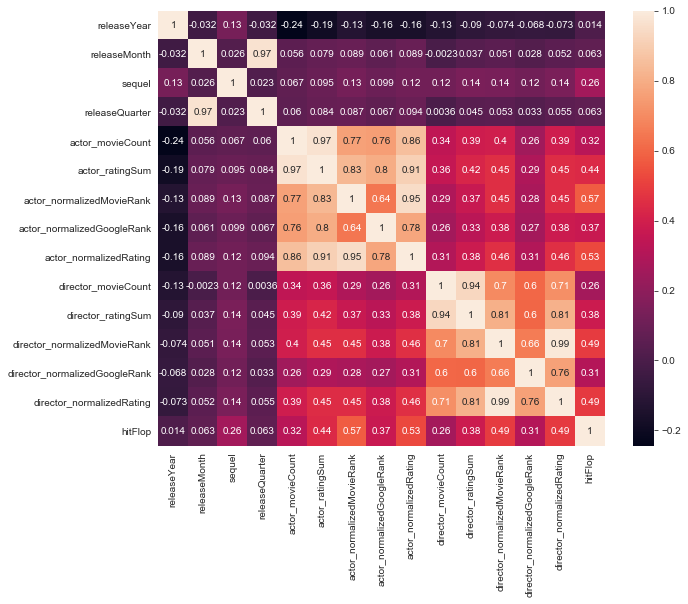

In [24]:
cols = [ 'releaseYear', 'releaseMonth', 'sequel', 'releaseQuarter','actor_movieCount', 'actor_ratingSum', 'actor_normalizedMovieRank',
       'actor_normalizedGoogleRank', 'actor_normalizedRating',
       'director_movieCount', 'director_ratingSum',
       'director_normalizedMovieRank', 'director_normalizedGoogleRank',
       'director_normalizedRating', 'hitFlop']
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(train2[cols].corr(),ax=ax,annot=True)

In [25]:
le = LabelEncoder()
train2['releaseYear'] = le.fit_transform(np.array(train2['releaseYear']))

#Saving pca and le model to be used in later notebooks
import pickle

with open('pca_model.pkl', 'wb') as file:  
    pickle.dump(pca, file)
with open('le_model.pkl', 'wb') as file:  
    pickle.dump(le, file)    

## Saving the processed data

In [26]:
train2.to_csv('data\Processed\processed_train.csv')